<a href="https://colab.research.google.com/github/jnkx9c/DL_Project/blob/master/CirclesAndSquares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers, models
from PIL import Image, ImageDraw
import random
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Data Creation
Randomly create images of circles or squares.<br>
After training, the model should be able to classify the shapes as circles or squares

In [0]:


size=128
r = 10  #radius of the circles
h=10    #height and width of the squares.
w=10
shapes = []       #list to hold the shape images as they are being created
labels=[]         #list to hold the shape labels as they are being created
item_count=1000   #the number of shapes to produce.
shape_dict = {'circle':0,'square':1}



def drawCircle():
  im = Image.new("L",(size,size))
  x = random.randint(r+2,size-r-2)
  y = random.randint(r+2,size-r-2)
  draw = ImageDraw.Draw(im)
  draw.ellipse((x-r, y-r, x+r, y+r),fill=(255))
  shapes.append(np.array(im,dtype='int'))
  labels.append(shape_dict['circle'])


def drawSquare():
  im = Image.new("L",(size,size))  
  x = random.randint(w+2,size-w-2)
  y = random.randint(h+2,size-h-2)
  draw = ImageDraw.Draw(im)
  draw.rectangle((x,y,x+w,y+h), fill=(255))
  shapes.append(np.array(im,dtype='int'))
  labels.append(shape_dict['square'])


  
#loop to create the shapes.
for n in range(0,item_count):
  rnd = random.randint(0,1)
  if rnd == 0:
    drawCircle()
  else:
    drawSquare()
    
images = np.array(shapes)




##Split the data
training should contain 800 images, validation should contain 200.<br>
images are nomalized to values between 0 and 1

In [85]:
train_images = images[:800]
train_images = train_images.reshape(train_images.shape[0],train_images.shape[1],train_images.shape[2],1)

val_images = images[800:]
val_images = val_images.reshape(val_images.shape[0],val_images.shape[1],val_images.shape[2],1)

train_labels = labels[:800]
val_labels = labels[800:]

train_images = train_images.astype( 'float32' ) / 255
val_images = val_images.astype('float32') / 255

train_labels = to_categorical( train_labels )
val_labels = to_categorical(val_labels)


print('train_images.shape = ',train_images.shape)
print('val_images.shape = ', val_images.shape)

print('train_labels.shape = ',train_labels.shape)
print('val_labels.shape = ',val_labels.shape)


train_images.shape =  (800, 128, 128, 1)
val_images.shape =  (200, 128, 128, 1)
train_labels.shape =  (800, 2)
val_labels.shape =  (200, 2)


## Visualize some of the training data
The title of the plot displays the catagorized label for that image.

[0 1] is a square.

[1 0] is a circle.

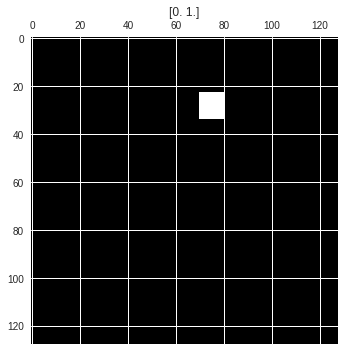

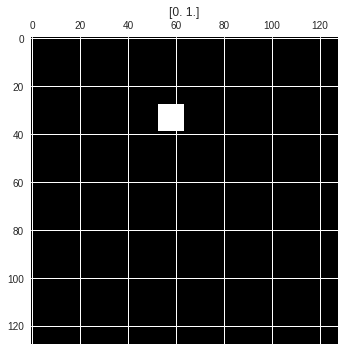

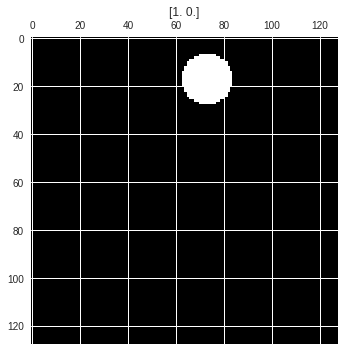

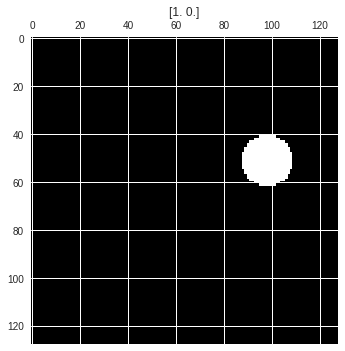

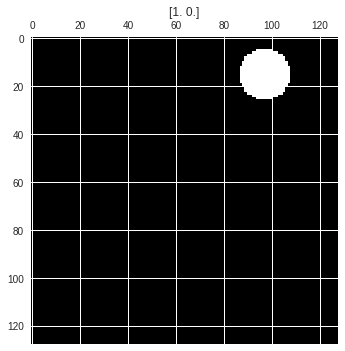

In [86]:

for idx,img in enumerate(train_images[0:5]):
  plt.matshow( img[:, :, 0], cmap = 'gray')
  plt.title("sup") 
  title = str(train_labels[idx])
  plt.title(title)
  plt.show()


## Create the model
The model is similiar (near exactly) to the MINST model, except that we have an output layer of size 2 instead of 10

In [87]:
print(train_images.shape)
model = models.Sequential()
model.add( layers.Conv2D( 32, ( 3, 3 ), activation = 'sigmoid', input_shape = train_images[0, :, :,:].shape ) )
model.add( layers.Conv2D( 16, ( 3, 3 ), activation = 'sigmoid' ) )
model.add( layers.Flatten() )
model.add( layers.Dense( 2, activation = 'softmax' ) )
model.summary()

(800, 128, 128, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 124, 124, 16)      4624      
_________________________________________________________________
flatten_5 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 492034    
Total params: 496,978
Trainable params: 496,978
Non-trainable params: 0
_________________________________________________________________


##Compile and Train

In [89]:
model.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history=model.fit( train_images, train_labels, epochs = 10, batch_size = 10, validation_data=(val_images,val_labels))


Train on 800 samples, validate on 200 samples
Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: 7.7245 - acc: 0.5175 - val_loss: 8.7844 - val_acc: 0.4550
Epoch 2/10
800/800 [==============================] - 1s 2ms/step - loss: 7.7770 - acc: 0.5175 - val_loss: 8.7844 - val_acc: 0.4550
Epoch 3/10
800/800 [==============================] - 1s 2ms/step - loss: 7.7770 - acc: 0.5175 - val_loss: 8.7844 - val_acc: 0.4550
Epoch 4/10
800/800 [==============================] - 1s 2ms/step - loss: 7.7770 - acc: 0.5175 - val_loss: 8.7844 - val_acc: 0.4550
Epoch 5/10
800/800 [==============================] - 1s 2ms/step - loss: 7.7770 - acc: 0.5175 - val_loss: 8.7844 - val_acc: 0.4550
Epoch 6/10
800/800 [==============================] - 1s 2ms/step - loss: 7.7770 - acc: 0.5175 - val_loss: 8.7844 - val_acc: 0.4550
Epoch 7/10
800/800 [==============================] - 1s 2ms/step - loss: 7.7770 - acc: 0.5175 - val_loss: 8.7844 - val_acc: 0.4550
Epoch 8/10
800/800 [==========

##Visualize the training

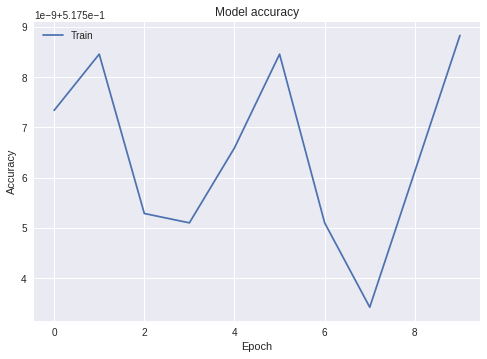

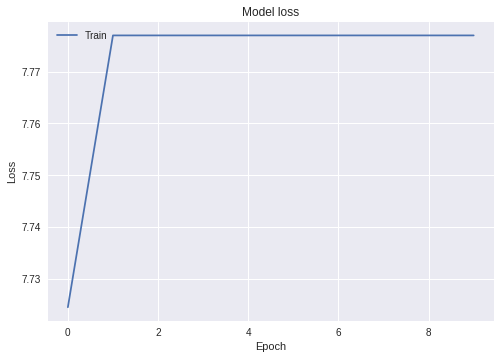

In [90]:

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()